# Ánalise descritiva

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df_renda_raw = pd.read_csv('previsao_de_renda.csv')
df_renda_raw

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


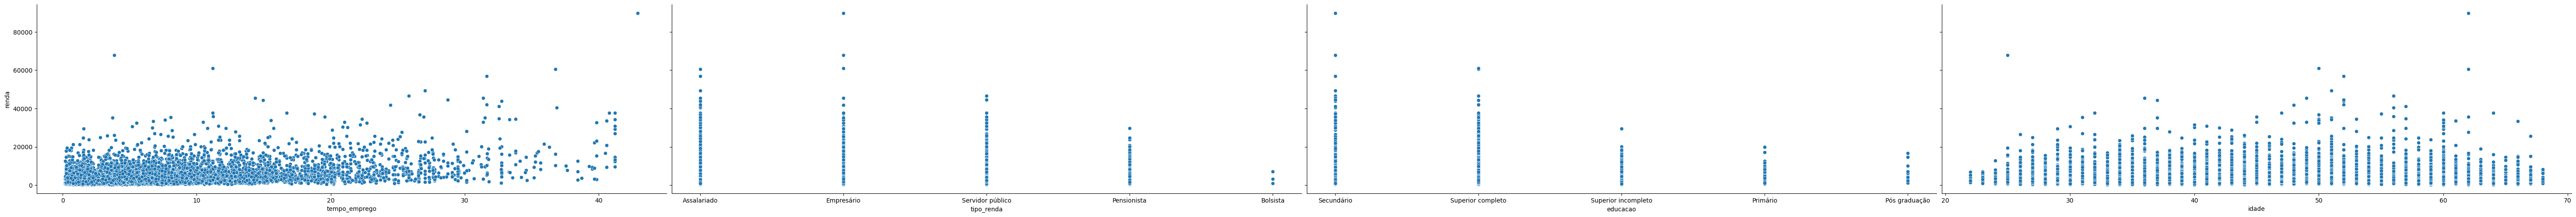

In [71]:
# Reralizando a matriz de dispersão, com algumas das variáveis que considero serem as mais importantes para uma avaliação financeira
variaveis_y = ['renda']
variaveis_x = ['tempo_emprego', 'tipo_renda','educacao','idade']

sns.pairplot(df_renda_raw, y_vars = variaveis_y, x_vars = variaveis_x, height = 5, aspect = 3)

C:\Users\rafa_\AppData\Local\Temp\ipykernel_3836\2397888273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacoes = df_renda_raw.corr()


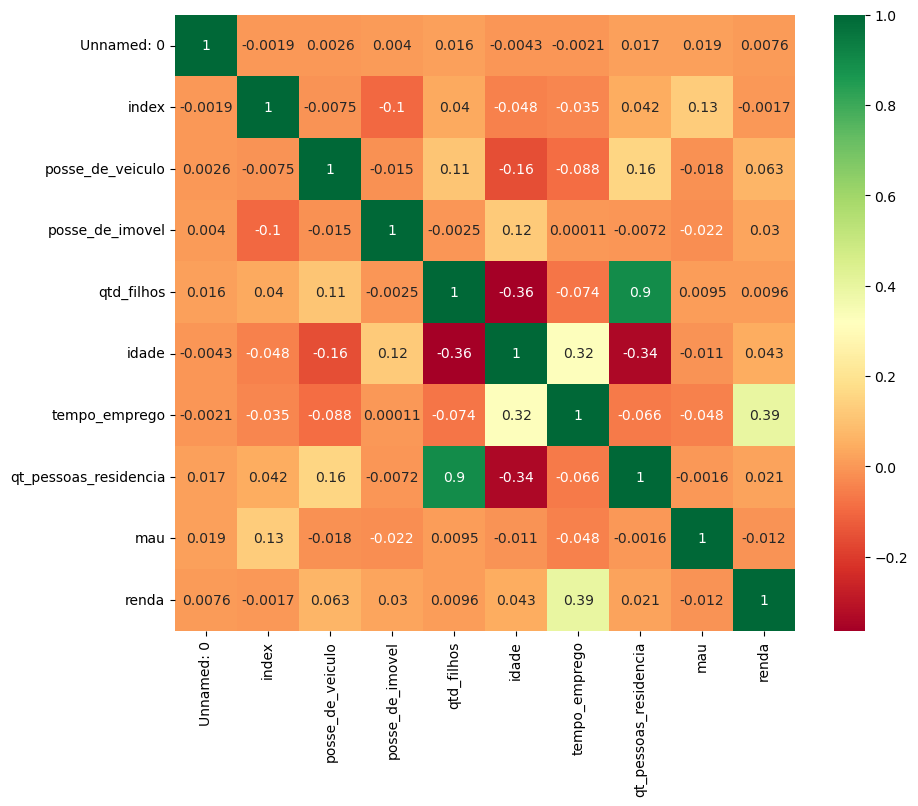

In [72]:
matriz_correlacoes = df_renda_raw.corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacoes, annot=True, cmap='RdYlGn')
plt.show()

#### A variável com a maior correlação com a "renda" é o "tempo_emprego" e posse de veículo. A "posse_de_veiculo" faz sentido existir com alguem com maior renda pois o poder de compra dessa pessoa é muito maior.

#### Na análise da matriz de dispersão, é possível observar que as variáveis "educacao" e "tipo_renda" também possuem uma correlação com a renda dos usuários. Mostrando que com um grau maior de escolaridade é possivel possuir uma maior renda. Também observamos que os maiores valores de renda estão em assalariados e empresários.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

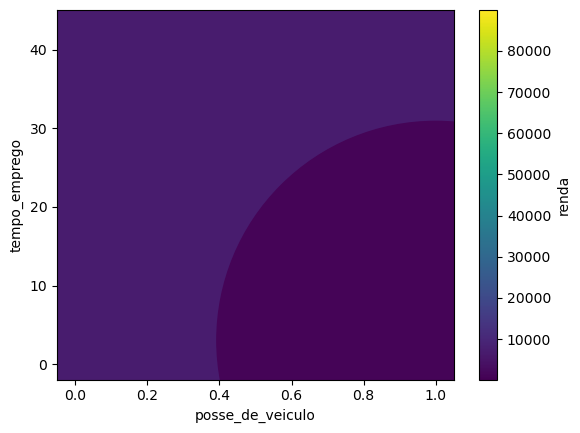

In [73]:
plt.scatter(df_renda_raw['posse_de_veiculo'], df_renda_raw['tempo_emprego'], c = df_renda_raw['renda'], s = df_renda_raw['renda']*100)
plt.xlabel('posse_de_veiculo')
plt.ylabel('tempo_emprego')
plt.colorbar(label = 'renda')
plt.show()

3) Na sua opinião, há outliers na variável renda?

<Axes: ylabel='renda'>

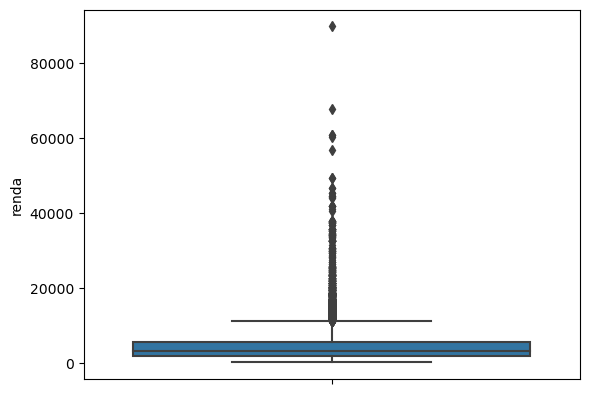

In [74]:
# Para verificar se existem possíveis outliers da variavel "renda" estou utilizando boxplot, para possuir uma visualização

sns.boxplot(data = df_renda_raw, y = 'renda')

In [75]:
# Após observar o gráfico boxplot, é possível confirmar que existem outliers. Agora utilizo o metodo do intervalo interquartil
Q1 = df_renda_raw['renda'].quantile(0.25)
Q3 = df_renda_raw['renda'].quantile(0.75)
IQR = Q3 - Q1

# Identificar os índices dos outliers e realizar a contagem deles
df_renda_raw['outlier'] = ((df_renda_raw['renda'] < Q1 - 1.5 * IQR) | (df_renda_raw['renda'] > Q3 + 1.5 * IQR))
qtd_outliers = df_renda_raw['outlier'].value_counts()[True]
print(qtd_outliers)

1026


4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='index', ylabel='rank_renda'>

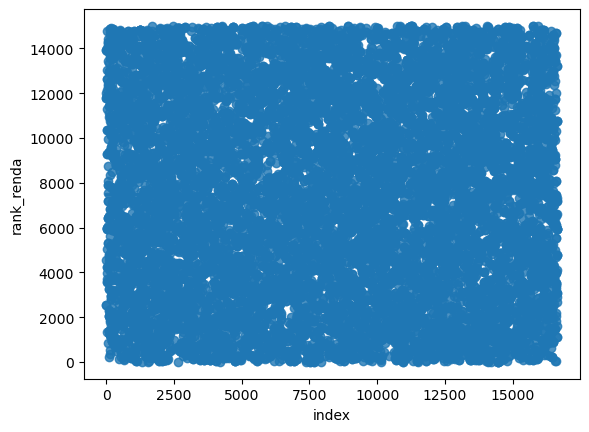

In [83]:
# Primeiro realizo o rank da variável 'renda' para poder fazer o log.
df_ranked = pd.DataFrame()

df_ranked['index'] = df_renda_raw['index'].copy()
df_ranked['renda'] = df_renda_raw['renda'].copy()
df_ranked['rank_renda'] = df_ranked['renda'].rank()

sns.regplot(x='index', y='rank_renda', data = df_ranked)

<Axes: xlabel='index', ylabel='log_y'>

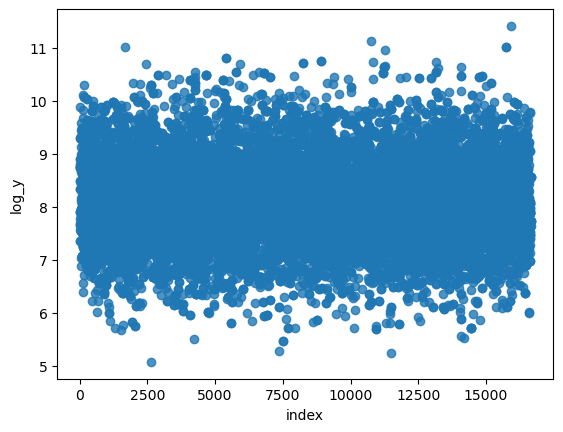

In [86]:
# Posso aplicar o logaritmo na variável renda e analisar o resultado
df4_log = df_ranked.copy()
df4_log['log_y'] = np.log(df4_log['renda'])

sns.regplot(x='index', y='log_y', data = df4_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

#### A aplicação do logaritmo fez com que os pontos não ficassem espalhados por todo mapa e melhorou os pontos, diminuindo muito os valores que podemos considerar outliers que estavam espalhados pelo gráfico.